In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import root_mean_squared_error as rmse
import time
import tkinter as tk
from tkinter import messagebox
import math
import matplotlib as mpl
from scipy.spatial import ConvexHull

# our functions
import predict_Beta_I
import choice_start_day
import plot_hyb

import warnings
warnings.filterwarnings(action='ignore')

# to account for updates when files change
%load_ext autoreload
%autoreload 2

In [2]:
df_seeds = pd.read_csv('initial_data/seeds_set_parameters.csv')
df_seeds[df_seeds.set!='test']['seed_number'].values

array([   0,    1,    2, ..., 1497, 1498, 1499])

In [27]:
def save_median(seed_dirs):
    betas = pd.DataFrame()
    fig = plt.figure(figsize=(6, 4)) 

    for i in df_seeds[df_seeds.set!='test']['seed_number'].values:
        df = pd.read_csv(seed_dirs+f'seir_seed_{i}.csv')
        epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
        if epidemic_end.shape[0] > 1:
            df.loc[epidemic_end[0]:, 'Beta'] = -2  # поправил на df.loc[...] вместо df['Beta'].loc[...]

        df = df[['Beta']]
        df.columns = [i]  # Переименовываем колонку 'Beta' в номер сида
        betas = pd.concat([betas, df], axis=1)

    median_beta = betas[betas >= 0].median(axis=1)    

    plt.plot(betas[betas>=0], marker='.', ls='',alpha=0.01, color='tab:blue')
    plt.plot(betas[betas>=0].median(axis=1), ls='-', color='orange', 
             label='$\mathregular{M_{median}}$')
    plt.ylim(0,betas.max().quantile(0.5))

    median_beta.to_csv(f'{seed_dirs}/median_beta.csv', header=['median_beta'])

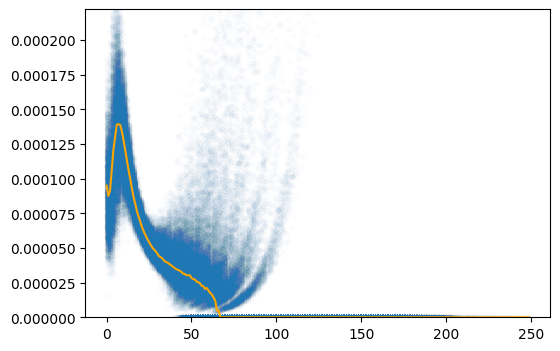

In [28]:
save_median(seed_dirs='initial_data/initial_data_ba_10000/')

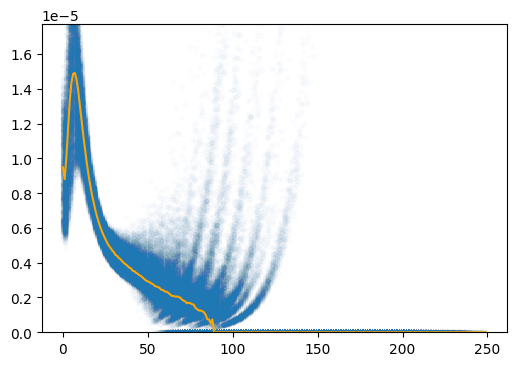

In [29]:
save_median(seed_dirs='initial_data/initial_data_ba_100000/')

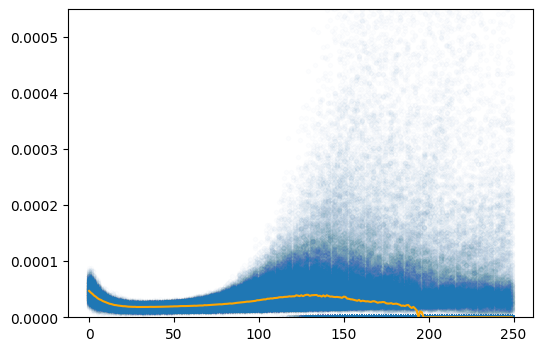

In [30]:
save_median(seed_dirs='initial_data/initial_data_sw_10000/')

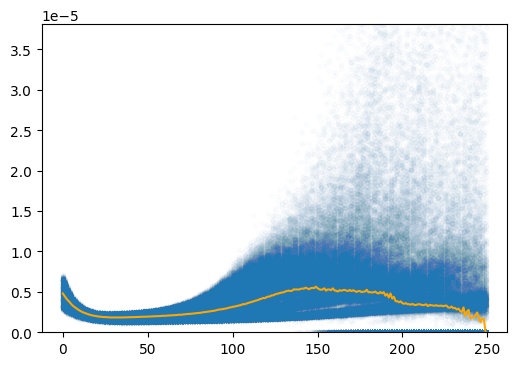

In [31]:
save_median(seed_dirs='initial_data/initial_data_sw_100000/')

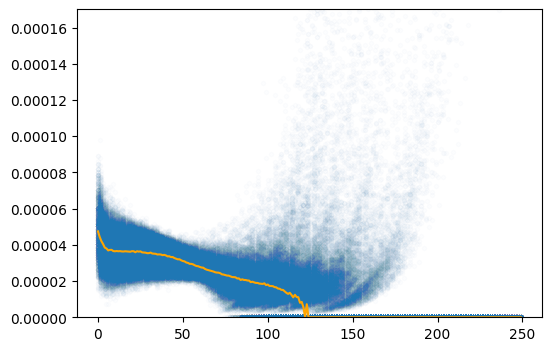

In [32]:
save_median(seed_dirs='initial_data/initial_data_r_10000/')

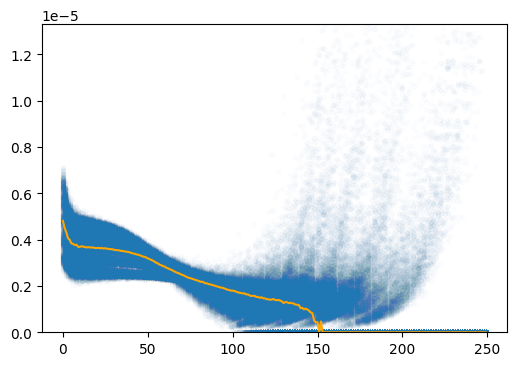

In [33]:
save_median(seed_dirs='initial_data/initial_data_r_100000/')